# PART 5 - ML DECISSION TREE REGRESSION

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

In [2]:
happy_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Happiness_df ready for ML.csv')

In [3]:
happy_df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
happy_df

,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,72.099998
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,73.000000
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,73.800003
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,71.800003
...,...,...,...,...,...,...,...,...
615,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,45.200001
616,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,61.098846
617,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,55.617260
618,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,51.000000


OPTION 1.1  
- Raw data
- Without treating outliers


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

def print_score(clf, X_train, y_train, X_test, y_test,train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
    
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        print('Cross Validation R2_score for train set: {}'.format(cv_scores.round(2)))
        print("\nAverage 10-Fold CV R2_score for train set: {}".format(np.mean(cv_scores).round(3)))
        print()   
        
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")
        
        cv_scores2 = cross_val_score(clf, X_test, 
                            y_test,cv=10, scoring='r2')
        print('Cross Validation R2_score for test set: {}'.format(cv_scores2.round(2)))
        print("\nAverage 10-Fold CV R2_score for test set: {}".format(np.mean(cv_scores2).round(3)))
        print()
        
        

In [6]:
# select target variable
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [7]:
y.shape

(620,)

In [8]:
X.shape

(620, 7)

In [9]:
from sklearn.model_selection import train_test_split

#split the train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
#instantiate the model
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_regressor = DecisionTreeRegressor(random_state=42) #random state try 0 or 42

In [11]:
#fit the model
Dec_Tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
print_score(Dec_Tree_regressor, X_train, y_train, X_test, y_test, train=True)
print_score(Dec_Tree_regressor, X_train, y_train, X_test, y_test, train=False)


Train Result:
MAE: 0.0000

MSE: 0.0000

RMSE: 0.0000

R^2: 1.0000

Cross Validation R2_score for train set: [0.88 0.92 0.83 0.83 0.85 0.82 0.81 0.84 0.76 0.87]

Average 10-Fold CV R2_score for train set: 0.841

Test Result:
MAE: 2.0387

MSE: 10.9534

RMSE: 3.3096

R^2: 0.7662

Cross Validation R2_score for test set: [0.9  0.84 0.83 0.77 0.84 0.85 0.85 0.8  0.48 0.86]

Average 10-Fold CV R2_score for test set: 0.802



In [13]:
y_pred1=Dec_Tree_regressor.predict(X_test)

In [14]:
df1=pd.DataFrame({'Real':y_test,'Pred_Dec_Tree_Raw':y_pred1})

In [15]:
df1.reset_index(inplace=True)

In [16]:
df1.drop(columns='index',inplace=True)

In [17]:
df1

,Real,Pred_Dec_Tree_Raw
0,74.180000,63.299999
1,66.006149,65.905174
2,68.300003,65.699997
3,61.099998,60.500000
4,63.799999,59.903549
...,...,...
200,66.400002,64.609962
201,64.808945,62.000000
202,67.000000,67.952736
203,72.099998,66.699997


OPTION 1.2

- Hypertuning the decision tree regression
- Raw data

In [24]:
y=happy_df.Life_exp_age
X=happy_df.drop(columns='Life_exp_age')

In [25]:
# split the datat
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:

from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("mse", "friedman_mse", "mae"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4] 
}


model = DecisionTreeRegressor(random_state=42)
grid_search_cv = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=10)#cross valid 10


In [27]:
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:   13.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             verbose=1)

In [28]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=42)

In [29]:
Dec_Tree_reg=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [30]:
Dec_Tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=42)

In [31]:
print_score(Dec_Tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(Dec_Tree_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.9427

MSE: 1.7788

RMSE: 1.3337

R^2: 0.9654

Cross Validation R2_score for train set: [0.9  0.95 0.93 0.83 0.88 0.94 0.83 0.92 0.83 0.88]

Average 10-Fold CV R2_score for train set: 0.887

Test Result:
MAE: 1.8740

MSE: 10.4678

RMSE: 3.2354

R^2: 0.7765

Cross Validation R2_score for test set: [0.8  0.49 0.88 0.73 0.89 0.81 0.92 0.82 0.54 0.9 ]

Average 10-Fold CV R2_score for test set: 0.779



In [32]:
ypred2=Dec_Tree_reg.predict(X_test)

In [33]:
df2=pd.DataFrame({'Real2':y_test,'Pred_Dec_Tree_tune':ypred2})

In [34]:
df2.reset_index(inplace=True)
df2.drop(columns='index',inplace=True)

In [35]:
df2

,Real2,Pred_Dec_Tree_tune
0,74.180000,60.925522
1,66.006149,67.018950
2,68.300003,67.018950
3,61.099998,61.049999
4,63.799999,60.261275
...,...,...
200,66.400002,67.018950
201,64.808945,65.031568
202,67.000000,68.230725
203,72.099998,67.018950


Using this model we can see that the model seems to be a little overfitting. Because we are getting very good results in the training but not as good in the test. 

OPTION 2

- Solve the overfitting problem
- To avoid overfitting I will select less features for my model


In [36]:
happy_df.head(1)

,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998


In [37]:
y=happy_df.Life_exp_age
X=happy_df.GDP

In [38]:
y.shape

(620,)

In [39]:
X.shape

(620,)

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [41]:
#because I'm working with only one feature I have to reshape my data
y_train =  np.array(y_train).reshape(-1, 1) 
X_train = np.array(X_train).reshape(-1, 1) 

y_test =  np.array(y_test).reshape(-1, 1)  
X_test = np.array(X_test).reshape(-1, 1) 

In [42]:
params = {
    "criterion":("mse", "friedman_mse", "mae"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4] 
}


model = DecisionTreeRegressor(random_state=42)
grid_search_cv = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=10)#cross valid 10


In [43]:
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:    3.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             verbose=1)

In [44]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=42,
                      splitter='random')

In [45]:
DecTreeReg=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='random')

In [46]:
DecTreeReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=42,
                      splitter='random')

In [47]:
print_score(DecTreeReg, X_train, y_train, X_test, y_test, train=True)
print_score(DecTreeReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 3.0720

MSE: 16.4845

RMSE: 4.0601

R^2: 0.6790

Cross Validation R2_score for train set: [0.57 0.56 0.6  0.59 0.66 0.7  0.64 0.64 0.66 0.56]

Average 10-Fold CV R2_score for train set: 0.62

Test Result:
MAE: 3.1189

MSE: 16.1183

RMSE: 4.0148

R^2: 0.6559

Cross Validation R2_score for test set: [0.48 0.81 0.81 0.77 0.55 0.84 0.55 0.71 0.22 0.39]

Average 10-Fold CV R2_score for test set: 0.613



In [48]:
y_pred=DecTreeReg.predict(X_test)

In [49]:
y_pred = np.array(y_pred).reshape(-1, 1)

In [50]:
type(y_pred)

numpy.ndarray

In [51]:
df3 = pd.DataFrame({'Real2': y_test[:, 0],'Pred_Dec_Tree_tune': y_pred[:, 0]})
df3

,Real2,Pred_Dec_Tree_tune
0,74.180000,66.085408
1,66.006149,66.085408
2,68.300003,69.712529
3,61.099998,55.250000
4,63.799999,58.724662
...,...,...
200,66.400002,66.085408
201,64.808945,63.413588
202,67.000000,62.241735
203,72.099998,71.882676


OPTION 3

- Now that I don't have Overfitting I will try to add another variable to get better metrics
- To avoid overfitting I will select less features for my model


In [52]:
y=happy_df.Life_exp_age
X=happy_df[['GDP','Happines_score']]

In [53]:
y.shape

(620,)

In [54]:
X.shape

(620, 2)

In [55]:
#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [56]:
params = {
    "criterion":("mse", "friedman_mse", "mae"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4] 
}


model = DecisionTreeRegressor(random_state=42)
grid_search_cv = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=10)#cross valid 10

In [57]:
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:   12.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             verbose=1)

In [58]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, random_state=42,
                      splitter='random')

In [59]:
Dec_Tree_regre=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='random')

In [60]:
Dec_Tree_regre.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=4, random_state=42,
                      splitter='random')

In [61]:
print_score(Dec_Tree_regre, X_train, y_train, X_test, y_test, train=True)
print_score(Dec_Tree_regre, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 2.5362

MSE: 12.5092

RMSE: 3.5368

R^2: 0.7564

Cross Validation R2_score for train set: [0.57 0.65 0.65 0.68 0.76 0.67 0.71 0.64 0.71 0.59]

Average 10-Fold CV R2_score for train set: 0.663

Test Result:
MAE: 2.7195

MSE: 13.4640

RMSE: 3.6693

R^2: 0.7126

Cross Validation R2_score for test set: [0.69 0.63 0.84 0.74 0.76 0.83 0.39 0.8  0.49 0.61]

Average 10-Fold CV R2_score for test set: 0.679



In [62]:
y_pred4=Dec_Tree_regre.predict(X_test)

In [63]:
df4=pd.DataFrame({'Real':y_test,'Pred_Dec_Tree_grind2feat':y_pred4})

In [64]:
df4.reset_index(inplace=True)
df4.drop(columns='index',inplace=True)

In [65]:
df4

,Real,Pred_Dec_Tree_grind2feat
0,74.180000,66.650002
1,66.006149,59.750591
2,68.300003,67.353384
3,61.099998,56.265980
4,63.799999,56.720844
...,...,...
200,66.400002,66.995039
201,64.808945,65.515579
202,67.000000,63.943874
203,72.099998,68.025000


OPTION 5
- Getting more features

In [66]:
y=happy_df.Life_exp_age
X=happy_df[['GDP','Happines_score','Social_support']]

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [68]:
params = {
    "criterion":("mse", "friedman_mse", "mae"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4] 
}


model = DecisionTreeRegressor(random_state=42)
grid_search_cv = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=10)#cross valid 10

In [69]:
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:   11.4s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             verbose=1)

In [70]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, random_state=42,
                      splitter='random')

In [71]:
Dec_tree_reg=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='random')

In [72]:
Dec_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, random_state=42,
                      splitter='random')

In [73]:
print_score(Dec_tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(Dec_tree_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 2.4718

MSE: 12.7282

RMSE: 3.5677

R^2: 0.7521

Cross Validation R2_score for train set: [0.78 0.65 0.52 0.66 0.79 0.68 0.63 0.78 0.71 0.5 ]

Average 10-Fold CV R2_score for train set: 0.672

Test Result:
MAE: 2.4377

MSE: 12.2564

RMSE: 3.5009

R^2: 0.7384

Cross Validation R2_score for test set: [0.69 0.76 0.88 0.57 0.74 0.63 0.79 0.85 0.54 0.51]

Average 10-Fold CV R2_score for test set: 0.697



In [74]:
y_pred5=Dec_tree_reg.predict(X_test)

In [75]:
df5=pd.DataFrame({'Real':y_test,'Pred_Dec_Tree_grind3feat':y_pred5})

In [76]:
df5.reset_index(inplace=True)
df5.drop(columns='index',inplace=True)

In [77]:
df5

,Real,Pred_Dec_Tree_grind3feat
0,74.180000,65.500000
1,66.006149,65.927512
2,68.300003,67.081996
3,61.099998,56.626162
4,63.799999,57.650630
...,...,...
200,66.400002,67.580307
201,64.808945,62.180720
202,67.000000,68.297068
203,72.099998,71.861896


OPTION 6

In [78]:
y=happy_df.Life_exp_age
X=happy_df[['GDP','Happines_score','Social_support','Gov_trust','Freedom']]

In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [80]:
params = {
    "criterion":("mse", "friedman_mse", "mae"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4] 
}


model = DecisionTreeRegressor(random_state=42)
grid_search_cv = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=10)#cross valid 10

In [81]:
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:   14.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             verbose=1)

In [82]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, random_state=42,
                      splitter='random')

In [83]:
DecTreReg=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='random')

In [84]:
DecTreReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42, splitter='random')

In [85]:
print_score(DecTreReg, X_train, y_train, X_test, y_test, train=True)
print_score(DecTreReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 1.6476

MSE: 6.4803

RMSE: 2.5457

R^2: 0.8738

Cross Validation R2_score for train set: [0.73 0.71 0.74 0.53 0.86 0.71 0.79 0.72 0.73 0.58]

Average 10-Fold CV R2_score for train set: 0.711

Test Result:
MAE: 2.4140

MSE: 12.2722

RMSE: 3.5032

R^2: 0.7380

Cross Validation R2_score for test set: [0.79 0.35 0.88 0.59 0.71 0.79 0.45 0.89 0.53 0.75]

Average 10-Fold CV R2_score for test set: 0.673



In [86]:
y_pred6=DecTreReg.predict(X_test)

In [87]:
df6=pd.DataFrame({'Real':y_test,'Pred_Dec_Tree_grind5feat':y_pred6})

In [88]:
df6.reset_index(inplace=True)
df6.drop(columns='index',inplace=True)

In [89]:
df6

,Real,Pred_Dec_Tree_grind5feat
0,74.180000,69.599998
1,66.006149,66.000000
2,68.300003,68.848938
3,61.099998,57.559215
4,63.799999,57.527982
...,...,...
200,66.400002,66.481040
201,64.808945,65.172553
202,67.000000,62.066020
203,72.099998,72.592324


PLOT THE PREDICTIONS OBTAINED:
- I'm going to plot the real values and the predicted next to it to see what option is the closest one to the real


In [90]:
#concat the 6 datasets 
df_predictions=df1.copy()

In [91]:
df_predictions['Pred_op2']=df2.Pred_Dec_Tree_tune

In [92]:
df_predictions['Pred_op3']=df3.Pred_Dec_Tree_tune

In [93]:
df_predictions['Pred_op4']=df4.Pred_Dec_Tree_grind2feat
df_predictions['Pred_op5']=df5.Pred_Dec_Tree_grind3feat
df_predictions['Pred_op6']=df6.Pred_Dec_Tree_grind5feat

In [94]:
df_predictions.rename(columns={'Pred_op2':'Pred_grid_allfeat','Pred_op3':'Pred_grid_one_feat',
                       'Pred_op4':'Pref_grid_2feat','Pred_op5':'Pref_grid_3feat',
                       'Pred_op6':'Pref_grid_5feat'},inplace=True)

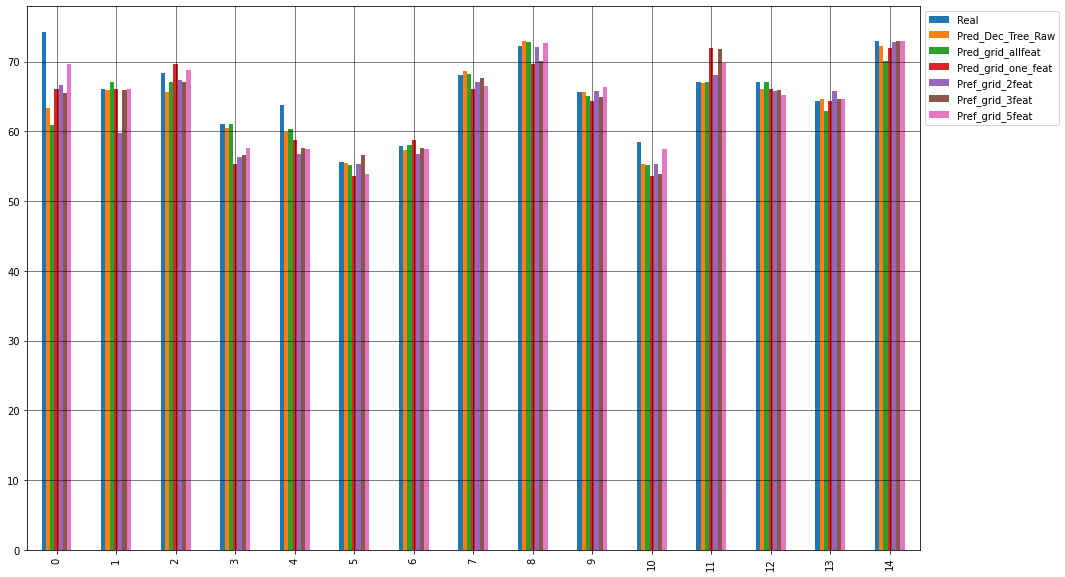

In [95]:
import matplotlib.pyplot as plt
df_predictions_plot = df_predictions.head(15)#get the 15 first predictions
df_predictions_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1.00))
plt.show()



With this graph we can observe that the worst predictions are done when using Decission Tree Regression with less features in the features group, in this case with one and two features (red and purple bars)

In [96]:
df6.to_csv('Best prediction decission tree.csv', index=False)